In [1]:
import pandas as pd
import numpy as np
import sklearn.cluster as kmeans
df=pd.read_csv("diabetic_data.csv")
df.drop(['encounter_id','patient_nbr','weight'],axis=1,inplace=True)
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6,25,1,1,?,Pediatrics-Endocrinology,41,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),1,1,7,3,?,?,59,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),1,1,7,2,?,?,11,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),1,1,7,2,?,?,44,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1,1,7,1,?,?,51,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [2]:
df.replace('?', np.nan, inplace=True)
df.replace('None', np.nan, inplace=True)

In [3]:
# handle columns with more than 75% missed value
to_drop_cols=[]
for col in df.columns:
    if df[col].isna().sum()/len(df) > 0.75 or len(df[col].unique()) ==1:
        to_drop_cols.append(col)

print(to_drop_cols)
df.drop(columns=to_drop_cols,inplace=True)
#df.head()

['max_glu_serum', 'A1Cresult', 'examide', 'citoglipton']


In [4]:
#handle missing values
numerical_cols = df.select_dtypes(include=['float', 'int']).columns
for col in numerical_cols:
    mean = df[col].mean()
    df[col].fillna(mean, inplace=True)

# replace missing values in string columns with mode
string_cols = df.select_dtypes(include=['object']).columns
for col in string_cols:
    mode = df[col].mode()[0]
    df[col].fillna(mode, inplace=True)

df.isna().sum()

race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazone                0
tolazamide

In [5]:

#Encoding object types to int 
from sklearn.preprocessing import LabelEncoder
objectCols=[]
for column in df.columns:
    if df[column].dtype=='object':
        objectCols.append(column)
X=df.copy()
Y=df['readmitted']
for col in objectCols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

Y = le.transform(Y)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 43 columns):
 #   Column                    Non-Null Count   Dtype
---  ------                    --------------   -----
 0   race                      101766 non-null  int32
 1   gender                    101766 non-null  int32
 2   age                       101766 non-null  int32
 3   admission_type_id         101766 non-null  int64
 4   discharge_disposition_id  101766 non-null  int64
 5   admission_source_id       101766 non-null  int64
 6   time_in_hospital          101766 non-null  int64
 7   payer_code                101766 non-null  int32
 8   medical_specialty         101766 non-null  int32
 9   num_lab_procedures        101766 non-null  int64
 10  num_procedures            101766 non-null  int64
 11  num_medications           101766 non-null  int64
 12  number_outpatient         101766 non-null  int64
 13  number_emergency          101766 non-null  int64
 14  number_inpatient    

In [6]:
#Compute correlation matrix:
corr_matrix = X.corr()['readmitted'].abs()
threshold = 0.059

to_drop=[] # drop columns list

for col in X.columns:
    if corr_matrix[col] < threshold:
        to_drop.append(col)

print("columns should be Remove with correlation: \n",to_drop)
X.drop(columns=to_drop,inplace=True,axis=1)
selected_df=X.copy(deep=True)
X.head()

columns should be Remove with correlation: 
 ['race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'payer_code', 'medical_specialty', 'num_lab_procedures', 'num_procedures', 'num_medications', 'diag_1', 'diag_2', 'diag_3', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed']


,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted
0,0,0,0,1,2
1,0,0,0,9,1
2,2,0,1,6,2
3,0,0,0,7,2
4,0,0,0,5,2


In [7]:
# Scaling data
cols=X.columns

    #standard normalization
# from sklearn.preprocessing import StandardScaler

# sc = StandardScaler() # creating an instance of the class object
# X = pd.DataFrame(sc.fit_transform(X), columns=cols)

###############################################################


  # min max scaler:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
X = ms.fit_transform(X)
X = pd.DataFrame(X, columns=[cols])
X.head()
##################################

    
    #Max Absolute scaler
# from sklearn.preprocessing import MaxAbsScaler

# ma = MaxAbsScaler() # creating an instance of the class object
# X = pd.DataFrame(ma.fit_transform(X), columns=cols)

################################################################

#     #Robust Scaler
# from sklearn.preprocessing import RobustScaler

# rs = RobustScaler() # creating an instance of the class object
# X = pd.DataFrame(rs.fit_transform(X), columns=cols)


,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted
0,0.000000,0.0,0.000000,0.000000,1.0
1,0.000000,0.0,0.000000,0.533333,0.5
2,0.047619,0.0,0.047619,0.333333,1.0
3,0.000000,0.0,0.000000,0.400000,1.0
4,0.000000,0.0,0.000000,0.266667,1.0


In [8]:
# implement PCA to Reduce Dimention
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
pca_df = pd.DataFrame(data = X_pca, columns = ['x', 'y'] )
pca_df.head()

,x,y
0,-0.306773,-0.414908
1,0.216829,0.093018
2,-0.289069,-0.079184
3,-0.288322,-0.015887
4,-0.294472,-0.148894


<Figure size 640x480 with 0 Axes>

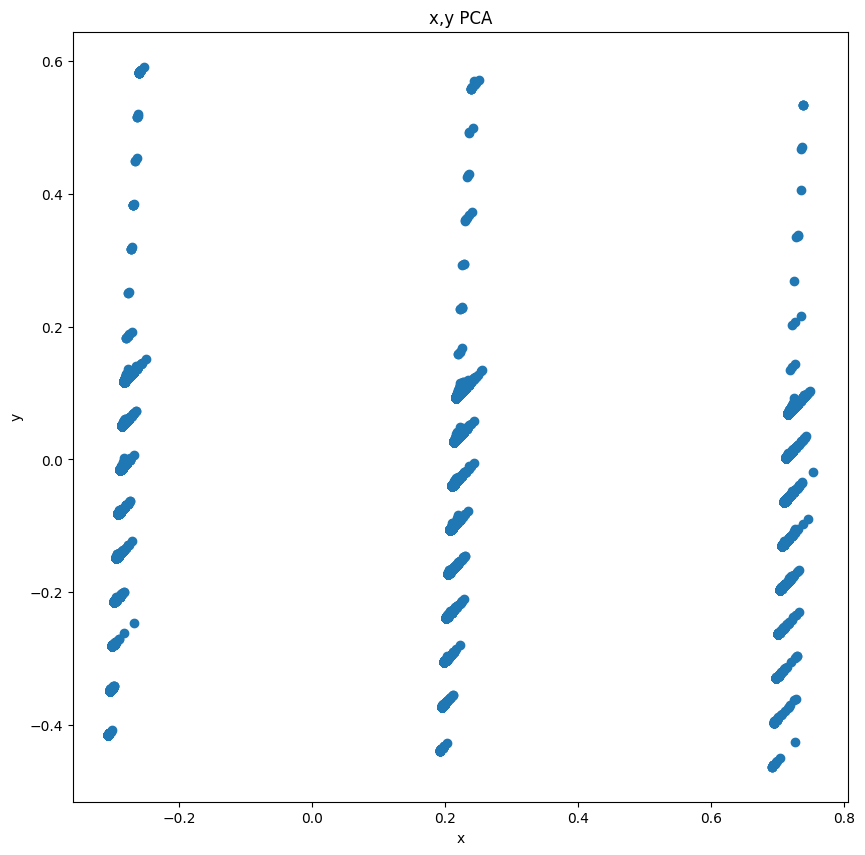

In [9]:
# data distributions diagram
import matplotlib.pyplot as plt
plt.figure()
plt.figure(figsize=(10,10))
plt.xlabel('x')
plt.ylabel('y')
plt.title('x,y PCA')
plt.scatter(pca_df['x'], pca_df['y'])

In [10]:
# K-Means clustering implementation with 3 clusters based on readmitted column:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 1)
y_kmeans = kmeans.fit_predict(X_pca)
X_pca[y_kmeans==1]

C:\Users\ASUS cebit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[-0.30677279, -0.41490808],
       [-0.28906887, -0.07918378],
       [-0.28832157, -0.01588727],
       ...,
       [-0.26972088,  0.38365517],
       [-0.2801422 ,  0.11928334],
       [-0.28217116,  0.11711966]])

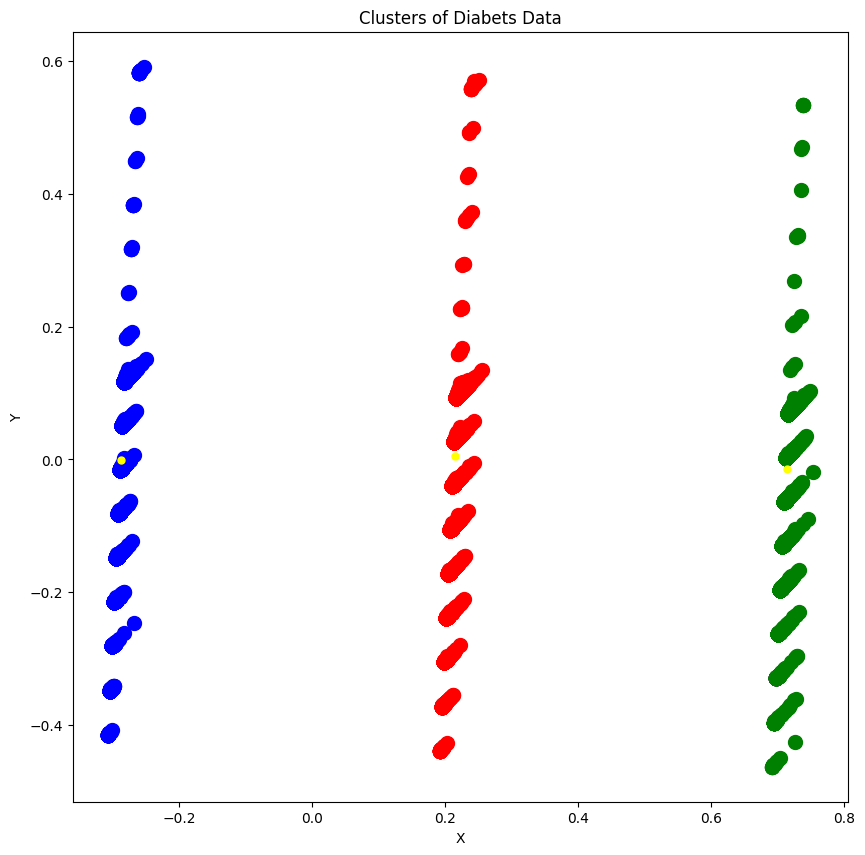

In [11]:
#clustered data
from matplotlib import colors as mcolors
principalComponents1=X_pca
plt.figure(figsize=(10,10))
plt.scatter(principalComponents1[y_kmeans == 0, 0], principalComponents1[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(principalComponents1[y_kmeans == 1, 0], principalComponents1[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(principalComponents1[y_kmeans == 2, 0], principalComponents1[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 25, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Diabets Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [12]:
#calcuate Silhouette score , inertia:

from sklearn.metrics import silhouette_score
silhouette = silhouette_score(X, y_kmeans)
print("silhouette : ",silhouette)
print("inertia: ",kmeans.inertia_)


silhouette :  0.6946818332878266
inertia:  1673.859119360119


In [13]:
#classification

from sklearn.preprocessing import StandardScaler
sc = StandardScaler() # creating an instance of the class object
X_knn = pd.DataFrame(sc.fit_transform(selected_df), columns=selected_df.columns)
X_knn.drop('readmitted',axis=1,inplace=True)
y_knn = selected_df['readmitted']

In [14]:
#importing train_test_split
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_train,X_test,y_train,y_test = train_test_split(X_knn,y_knn,test_size=0.4,random_state=42, stratify=y_knn)

test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)

    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

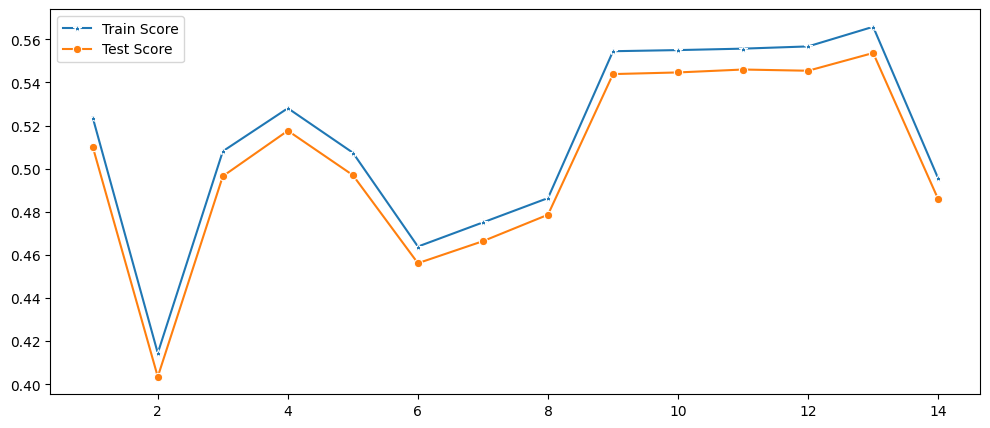

In [15]:
import seaborn as sns
plt.figure(figsize=(12,5))
p = sns.lineplot(x=range(1,15),y=train_scores,marker='*',label='Train Score')
p = sns.lineplot(x=range(1,15),y=test_scores,marker='o',label='Test Score')